In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,VotingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv(r'C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\laptop_data.csv')

In [97]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [99]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [100]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [101]:
df['Ram']=df['Ram'].str.split('G').str[0]

In [102]:
df['Weight']=df['Weight'].str.split('k').str[0]

In [103]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('Float32')

## Anaylsising the data

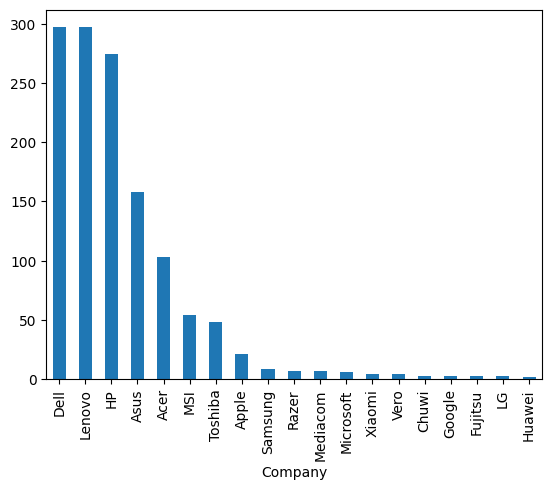

In [104]:
# Checking company
df['Company'].value_counts().plot(kind='bar')
plt.show()

In [105]:
## Cheking the corr() of price

In [106]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.0,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.69,9270.720000
25%,14.000000,4.000000,1.5,31914.720000
50%,15.600000,8.000000,2.04,52054.560000
75%,15.600000,8.000000,2.3,79274.246400
max,18.400000,64.000000,4.7,324954.720000


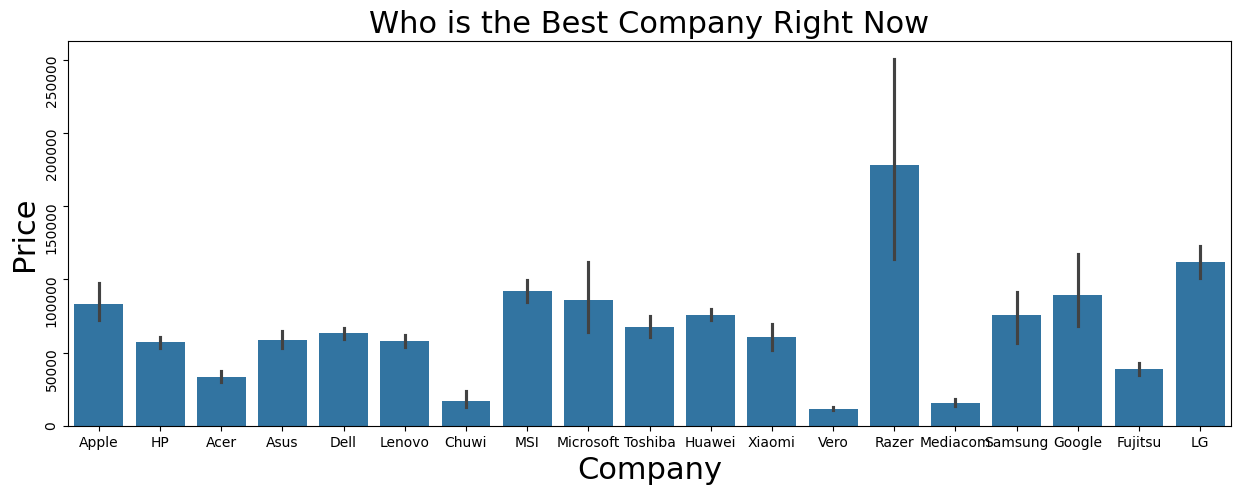

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(x='Company',y='Price',data=df)
plt.xlabel('Company',size=22)
plt.ylabel('Price',size=22)
plt.title('Who is the Best Company Right Now',size=22)
plt.yticks(rotation='vertical')
plt.show()

In [108]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


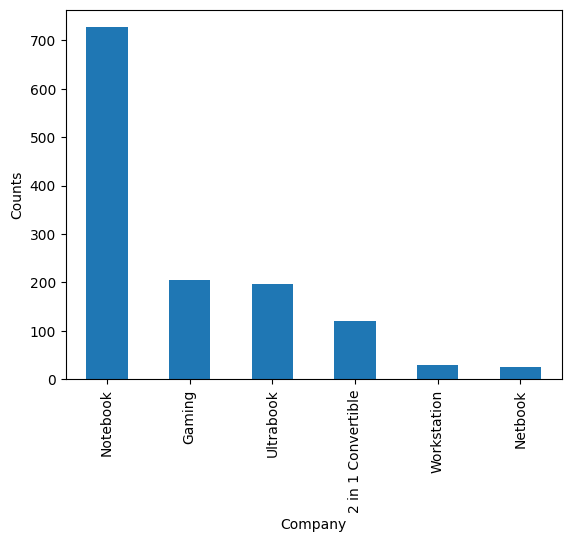

In [109]:
df['TypeName'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Company')
plt.show()

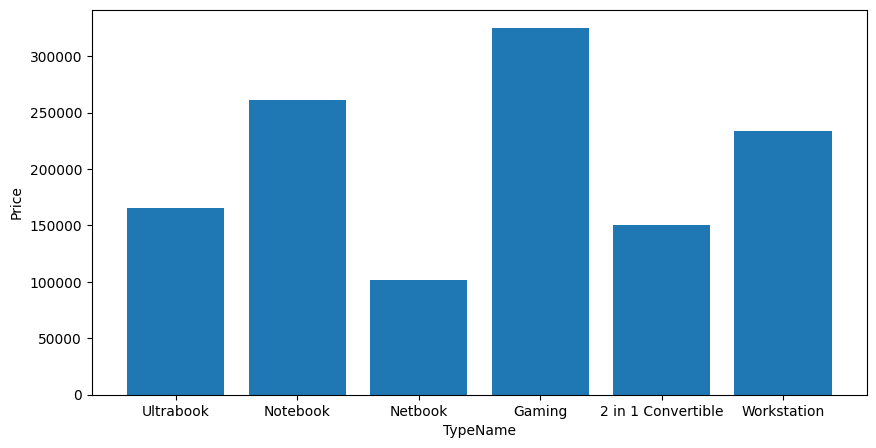

In [110]:
plt.figure(figsize=(10,5))
plt.bar(df['TypeName'],df['Price'])
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.show()

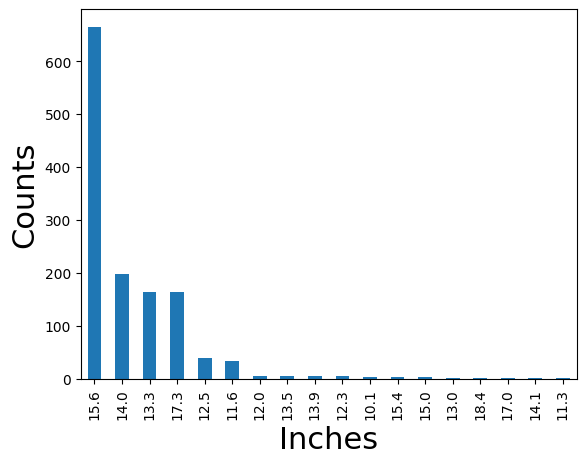

In [111]:
df['Inches'].value_counts().plot(kind='bar')
plt.ylabel('Counts',size=22)
plt.xlabel('Inches',size=22)
plt.show()

In [112]:
## Now i am checking the price with inches

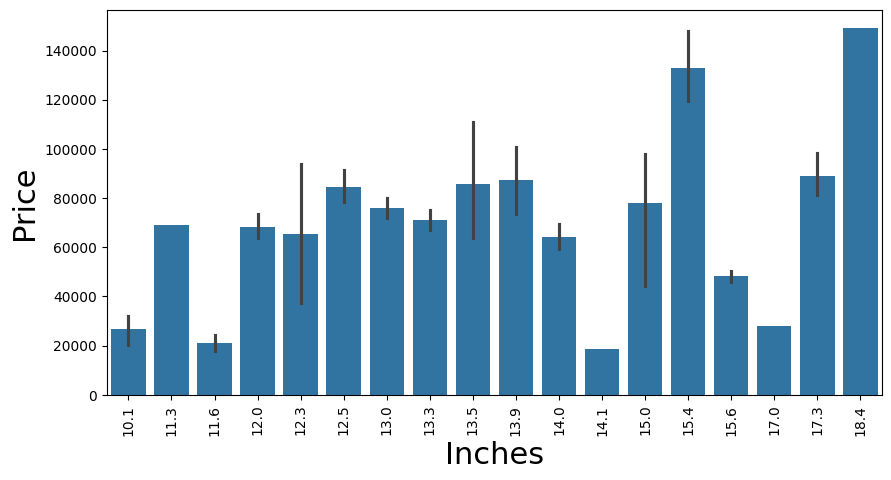

In [113]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.xlabel('Inches',size=22)
plt.ylabel('Price',size=22)
sns.barplot(x='Inches',y='Price',data=df)
plt.show()

In [114]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [115]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [116]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [117]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


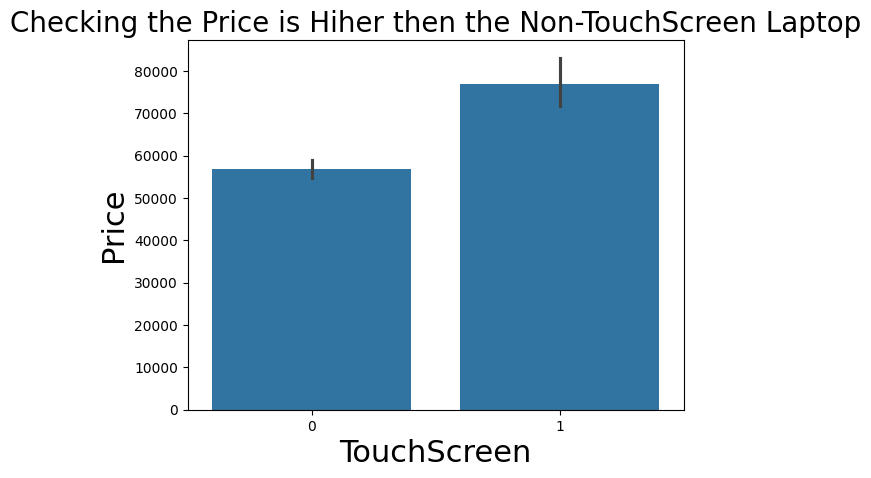

In [118]:
sns.barplot(x='TouchScreen',y='Price',data=df)
plt.title('Checking the Price is Hiher then the Non-TouchScreen Laptop',size=20)
plt.xlabel('TouchScreen',size=22)
plt.ylabel('Price',size=22)
plt.show()

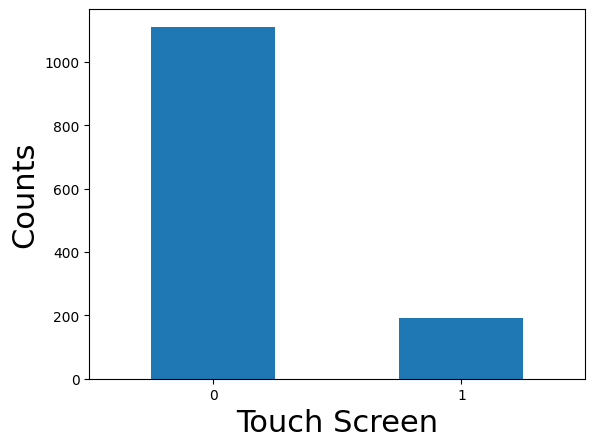

In [119]:
df['TouchScreen'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts',size=22)
plt.xlabel('Touch Screen',size=22)
plt.show()


0 Means is laptop is non-TouchScreen Laptop and 
1 is TouchScreen Laptop 

In [120]:
df['IPS_Panel']=df['ScreenResolution'].apply(lambda x: 1 if "IPS Panel" in x else 0)

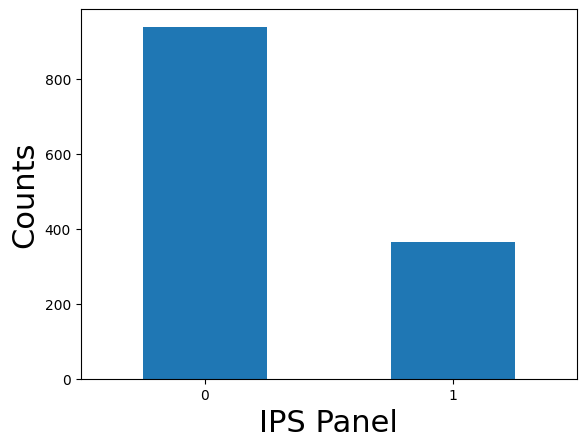

In [121]:
df['IPS_Panel'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('IPS Panel',size=22)
plt.ylabel('Counts',size=22)
plt.show()

and let me check the correaltion between price

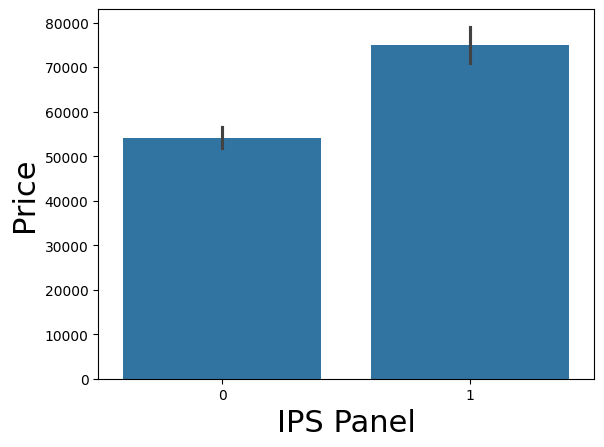

In [122]:
sns.barplot(x='IPS_Panel',y='Price',data=df)
plt.xlabel('IPS Panel',size=22)
plt.ylabel('Price',size=22)
plt.show()

There is a Slightly difference in the Price

In [123]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [124]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [125]:
df['x_res']=new[0]
df['y_res']=new[1]

In [126]:
new_res=df['x_res'].str.split(' ').str[-1]

In [127]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   Float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS_Panel         1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: Float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 143.9+ KB


In [129]:
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [130]:
df['PPi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')

In [131]:
## Now i am droping the ScreenResolution,x_res,y_res,inches
df.drop(['Inches','x_res','y_res','ScreenResolution'],axis=1,inplace=True)

In [132]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [133]:
df['Cpu_Name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [134]:
def find_cpu(text):
    if text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [135]:
df['Cpu_brand']=df['Cpu_Name'].apply(find_cpu)

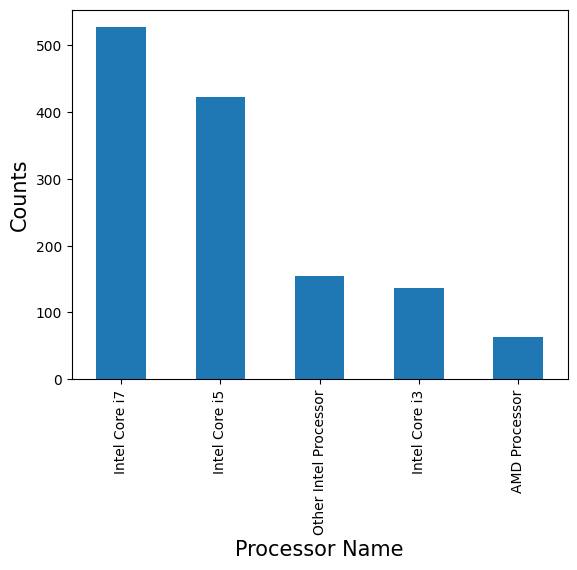

In [136]:
df['Cpu_brand'].value_counts().plot(kind='bar')
plt.xlabel('Processor Name',size=15)
plt.ylabel('Counts',size=15)
plt.show()

In [137]:
## lets Check the Price is variey on the processor Cpu

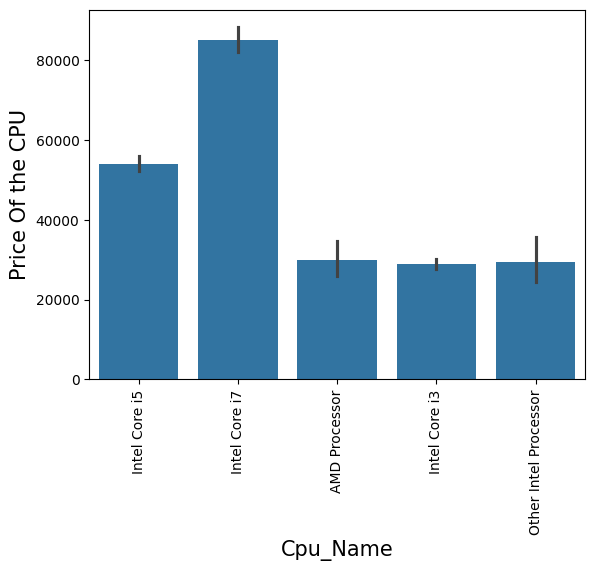

In [138]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cpu_brand',y="Price",data=df)
plt.xlabel('Cpu_Name',size=15)
plt.ylabel('Price Of the CPU',size=15)
plt.show()

Now Droping the CPU_Name and CPU Columns 

In [139]:
df.drop(['Cpu_Name','Cpu'],axis=1,inplace=True)

In [140]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [141]:
## Lets Came on the RAM

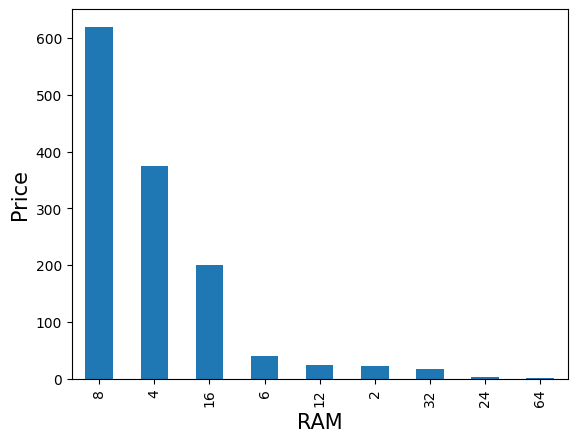

In [142]:
df['Ram'].value_counts().plot(kind='bar')
plt.xlabel('RAM',size=15)
plt.ylabel('Price',size=15)
plt.show()

## Now Working on the Memory Column 

In [143]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [144]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [145]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]
df['layer1_HDD']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer1_SDD']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer1_Hybrid']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer1_Flash']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['first']=df['first'].str.replace(r'\D','')

df['second'].fillna("0",inplace=True)
df['layer2_HDD']=df['second'].apply(lambda x : 1 if 'HDD' in x else 0 )
df['layer2_SDD']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer2_Hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer2_Flash']=df['second'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['second']=df['second'].str.replace(r'\D','')


In [146]:
df['first']=df['first'].str.replace('SSD','')
df['first']=df['first'].str.replace('HDD','')
df['first']=df['first'].str.replace('Flash Storage','')
df['first']=df['first'].str.replace('Hybrid','')

In [147]:
df['second']=df['second'].str.replace('HDD','')
df['second']=df['second'].str.replace('SSD','')
df['second']=df['second'].str.replace('Hybrid','')

In [148]:
df['second']=df['second'].str.strip()

In [149]:
df['second']=df['second'].astype(int)

In [150]:
df['first']=df['first'].astype(int)

In [151]:
df['HDD']=(df['first']*df['layer1_HDD']+df['second']*df['layer2_HDD'])

In [152]:
df['SSD']=(df['first']*df['layer1_SDD']+df['second']*df['layer2_SDD'])

In [153]:
df['Hybrid']=(df['first']*df['layer1_Hybrid']+df['second']*df['layer2_Hybrid'])

In [154]:
df['Flash Stroage']=(df['first']*df['layer1_Flash']+df['second']*df['layer2_Flash'])

In [155]:
df.drop(columns=['first','second','layer1_HDD','layer1_SDD','layer1_Hybrid','layer1_Flash','layer2_HDD','layer2_SDD','layer2_Hybrid',
                'layer2_Flash'],inplace=True)

In [156]:
df.drop(['Memory'],axis=1,inplace=True)

In [157]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand,HDD,SSD,Hybrid,Flash Stroage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [158]:
#df['Gpu_Name']=df['Gpu'].apply(lambda x:' '.join(x.split(' ')[0:2]))

In [159]:
df['Gpu_Name']=df['Gpu'].apply(lambda x: x.split(' ')[0])

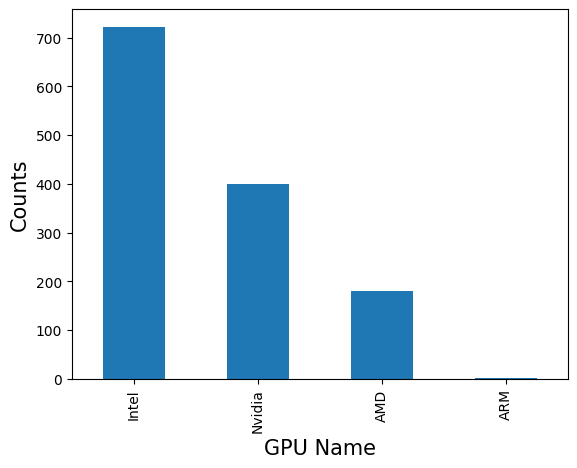

In [160]:
df['Gpu_Name'].value_counts().plot(kind='bar')
plt.xlabel('GPU Name',size=15)
plt.ylabel('Counts',size=15)
plt.show()

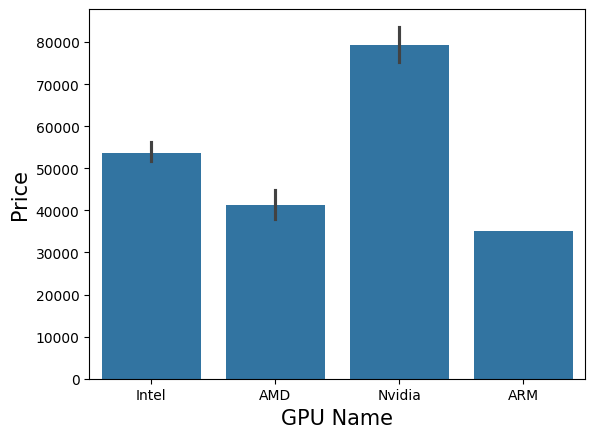

In [161]:
sns.barplot(x='Gpu_Name',y='Price',data=df)
plt.xlabel('GPU Name',size=15)
plt.ylabel('Price',size=15)
plt.show()

## Now Came on the OpSys

In [162]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [163]:
def convert_opsys(text):
    if text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return "Windows"
    else:
        if text=="macOS" or text=="Mac OS X" :
            return "Mac"
        elif text=="Linux":
            return "Linux"
        else:
            return "Other Operating System"

In [164]:
df['OpSys']=df['OpSys'].apply(convert_opsys)

In [165]:
#df.drop(['OPSys'],axis=1,inplace=True)

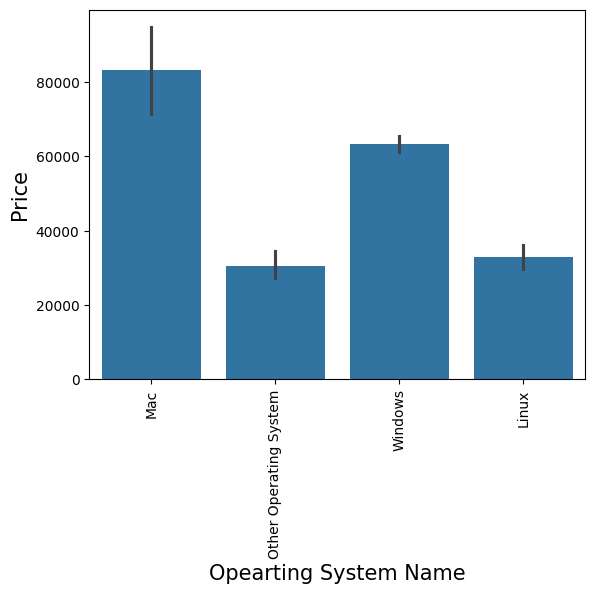

In [166]:
sns.barplot(x="OpSys",y="Price",data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Opearting System Name',size=15)
plt.ylabel('Price',size=15)

plt.show()

In [167]:
df.drop(['Gpu'],axis=1,inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   OpSys          1303 non-null   object 
 4   Weight         1303 non-null   Float32
 5   Price          1303 non-null   float64
 6   TouchScreen    1303 non-null   int64  
 7   IPS_Panel      1303 non-null   int64  
 8   PPi            1303 non-null   float64
 9   Cpu_brand      1303 non-null   object 
 10  HDD            1303 non-null   int64  
 11  SSD            1303 non-null   int64  
 12  Hybrid         1303 non-null   int64  
 13  Flash Stroage  1303 non-null   int64  
 14  Gpu_Name       1303 non-null   object 
dtypes: Float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 143.9+ KB


In [169]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand,HDD,SSD,Hybrid,Flash Stroage,Gpu_Name
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Other Operating System,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [170]:
df['OpSys'].unique()

array(['Mac', 'Other Operating System', 'Windows', 'Linux'], dtype=object)

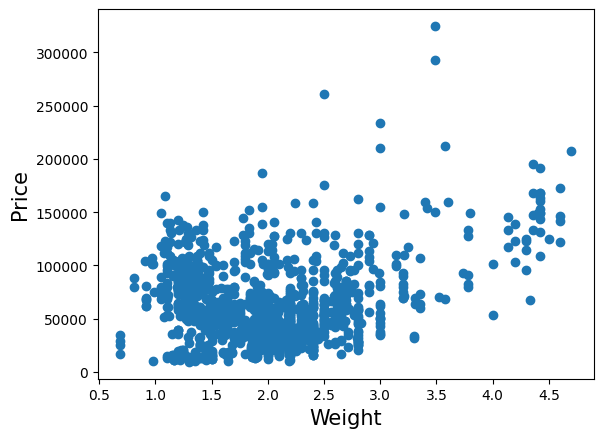

In [171]:
## Weights 
plt.xlabel('Weight',size=15)
plt.ylabel('Price',size=15)
plt.scatter(x='Weight',y='Price',data=df)
plt.show()

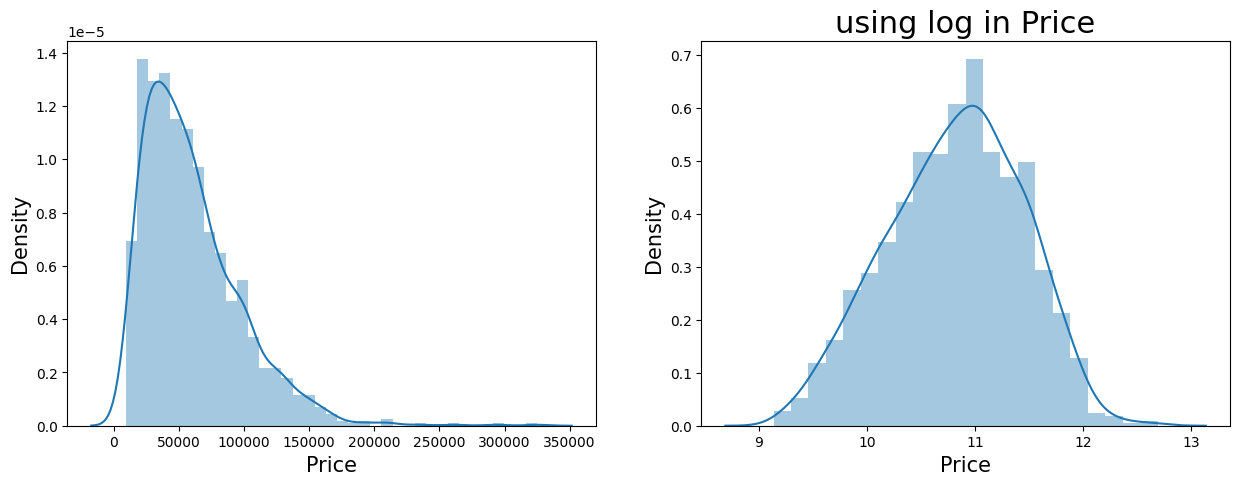

In [172]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('Price',size=15)
plt.ylabel('Density',size=15)
sns.distplot(df['Price'])

plt.subplot(1,2,2)
## Using Distplot 
plt.title('using log in Price',size=22)
plt.xlabel('Price',size=15)
plt.ylabel('Density',size=15)
sns.distplot(np.log(df['Price']))
plt.show()

In [173]:
df.drop(['Hybrid','Flash Stroage'],axis=1,inplace=True)

In [174]:
X=df[['Company','TypeName','Ram','OpSys','Weight','TouchScreen','IPS_Panel','PPi','Cpu_brand','HDD','SSD','Gpu_Name']]
Y=np.log(df['Price'])

In [175]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [176]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand,HDD,SSD,Gpu_Name
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel


## LinearRegression ()

In [177]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
pipe_pred=pipe.predict(x_test)
print('LinearRegression',r2_score(y_test,pipe_pred))

LinearRegression 0.8259397302865781


## RidgeRegression()

In [178]:
step_R_1=ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])

],remainder='passthrough')

step_R_2=Ridge(alpha=1.0)
pipe_ridge=Pipeline([
    ('step_R_1',step_R_1),
    ('Step_R_2',step_R_2)
])
pipe_ridge.fit(x_train,y_train)
pipe_ridge_pred=pipe_ridge.predict(x_test)
print('Ridge',r2_score(y_test,pipe_ridge_pred))

Ridge 0.8256267541754913


## LassoRegression()

In [179]:
step_L_1=ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])

],remainder='passthrough')

step_L_2=Lasso(alpha=1.0)
pipe_lasso=Pipeline([
    ('step_L_1',step_L_1),
    ('Step_L_2',step_L_2)
])
pipe_lasso.fit(x_train,y_train)
pipe_lasso_pred=pipe_lasso.predict(x_test)
print('Ridge',r2_score(y_test,pipe_lasso_pred))

Ridge 0.5086840484430637


## DecisionTreeRegressor()

In [180]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')
step2_decision=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,max_features=0.75)
pipe_decision=Pipeline([
    ('step1',step1),
    ('step2_decision',step2_decision)
])

pipe_decision.fit(x_train,y_train)
pipe_pred_D=pipe_decision.predict(x_test)
print('DecisionRegressor',r2_score(y_test,pipe_pred_D))

DecisionRegressor 0.7884646581245255


In [181]:
# step1=ColumnTransformer(transformers=[
#     ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
# ],remainder='passthrough')

# paramter={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],
#           'max_depth':[100,200,300,500,1000,None],'max_features':['sqrt', 'log2',0.5,0.75,None]}
# grid_decision=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=paramter,scoring='r2',n_jobs=-1,cv=5)

# pipe_grid=Pipeline([
#     ('step1',step1),
#      ('step_decision',grid_decision)
#  ])

# pipe_grid.fit(x_train,y_train)


## RandomForestRegressor()

In [182]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')
step2_random=RandomForestRegressor(n_estimators=2000,criterion='friedman_mse',max_features=0.75,max_samples=0.75,bootstrap=True)
pipe_R=Pipeline([
    ('step1',step1),
    ('step2_random',step2_random)
])

pipe_R.fit(x_train,y_train)
pipe_pred_R=pipe_R.predict(x_test)
print('RandomForestRegressor',r2_score(y_test,pipe_pred_R))

RandomForestRegressor 0.8723719182978416


## GradientBoostingRegressor()

In [183]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')
step2_gradient=GradientBoostingRegressor(loss='squared_error',learning_rate=0.01,n_estimators=1000,max_depth=5,max_features=0.75)
pipe_G=Pipeline([
    ('step1',step1),
    ('step2_gradient',step2_gradient)
])
pipe_G.fit(x_train,y_train)
pipe_pred_G=pipe_G.predict(x_test)
print('GradientBoostingRegressor',r2_score(y_test,pipe_pred_G))

GradientBoostingRegressor 0.8830352927490681


## AdaBoostingRegressor()

In [184]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')
dec=DecisionTreeRegressor(max_depth=1)
step2_adaboost=AdaBoostRegressor(estimator=dec,n_estimators=3000,learning_rate=0.01,loss='square')
pipe_A=Pipeline([
    ('step1',step1),
    ('step2_gradient',step2_adaboost)
])
pipe_A.fit(x_train,y_train)
pipe_pred_A=pipe_A.predict(x_test)
print('GradientBoostingRegressor',r2_score(y_test,pipe_pred_A))

GradientBoostingRegressor 0.6393223631525272


## BaggingRegressor()

In [185]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')

step2_bagging=BaggingRegressor(n_estimators=50,max_samples=0.75,max_features=0.75,bootstrap=True)
pipe_bag=Pipeline([
    ('step1',step1),
    ('step2_gradient',step2_bagging)
])
pipe_bag.fit(x_train,y_train)
pipe_pred_bag=pipe_bag.predict(x_test)
print('BaggingRegressor',r2_score(y_test,pipe_pred_bag))

BaggingRegressor 0.8729528673122009


## VotingRegressor()

In [186]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')


estimator=[('grad',step2_gradient)]

step2_vot=VotingRegressor(estimators=estimator)
pipe_vot=Pipeline([
    ('step1',step1),
    ('step2_gradient',step2_vot)
])
pipe_vot.fit(x_train,y_train)
pipe_pred_vot=pipe_vot.predict(x_test)
print('VotingRegressor',r2_score(y_test,pipe_pred_vot))

VotingRegressor 0.8801920653473899


## XGBRegressor

In [187]:
step1=ColumnTransformer(transformers=[
    ('col_traf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','OpSys','Cpu_brand','Gpu_Name'])
],remainder='passthrough')

step2_xgb=XGBRegressor()
pipe_xgb=Pipeline([
    ('step1',step1),
    ('step2_gradient',step2_xgb)
])
pipe_xgb.fit(x_train,y_train)
pipe_pred_xgb=pipe_xgb.predict(x_test)
print('BaggingRegressor',r2_score(y_test,pipe_pred_xgb))

BaggingRegressor 0.8726421759074906


In [188]:
import pickle 

In [198]:
pickle.dump(pipe_G,open('pipe_laptop_1.pkl','wb'))

In [190]:
pickle.dump(df,open('df.pkl','wb'))

In [191]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPi,Cpu_brand,HDD,SSD,Gpu_Name
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other Operating System,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [192]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [193]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [194]:
df['Cpu_brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [195]:
df['OpSys'].unique()

array(['Mac', 'Other Operating System', 'Windows', 'Linux'], dtype=object)

In [196]:
df['Gpu_Name'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)